<h1>Udacity Self-Driving Car Nanodegree Program</h1>


<h2>Advanced Lane Finding Project</h2>
    
<b>The steps of this project are the following::</b>

<ol>
    <li>Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.</li>
    <li>Apply a distortion correction to raw images.</li>
    <li>Use color transforms, gradients, etc., to create a thresholded binary image.</li>
    <li>Apply a perspective transform to binary image ("birds-eye view").</li>
    <li>Detect lane pixels and fit to find the lane boundary.</li>
    <li>Determine the curvature of the lane and vehicle position with respect to center.</li>
    <li>Warp the detected lane boundaries back onto the original image.</li>
    <li>Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.</li>
</ol>

In [1]:
# import all needed libraries
import numpy as np 
import cv2 
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
import os 
import pickle

%matplotlib inline

<h3>Camera Calibration and Undistortion of Images</h3>

In [2]:
nx = 9
ny = 6
img_dir_path = './camera_cal/calibration*.jpg'

# Make a list of calibration images
images = glob.glob(img_dir_path)
    
def find_img_obj_points():
    # 1. Prepare object points like (0,0,0), (1,0,0), ..., (8,5,0)
    objp = np.zeros((ny*nx,3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) #x,y coordinates 

    # 2. Arrays to store object points and image points from all the images.
    objpoints = [] # 3d points in real world space
    imgpoints = [] # 2d points in image plane.
    image_size = None
    
    # 3. Create a figure for plotting imgs
    f, axes = plt.subplots(1,2,figsize=(30,30))
    
    # 4. Step through the list and search for chessboard corners
    for i, fname in enumerate(images):
        origin_img = cv2.imread(fname)
        if i==2: 
            image_size = (origin_img.shape[0], origin_img.shape[1])
            # Plotting the original Image
            axes[0].set_title('Original Image', fontsize=20)
            axes[0].imshow(origin_img)
        gray = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)
        # Find the chessboard corners in distorted img
        ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)
        
        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)
            # Draw and display the corners
            cv2.drawChessboardCorners(origin_img, (nx,ny), corners, ret)
            if i==2: 
                # Plotting original Image with Chessboard Corners
                axes[1].set_title('Image with Chessboard Corners', fontsize=20)
                axes[1].imshow(origin_img)
        
    return objpoints, imgpoints, image_size

In [3]:
def calc_calibration_params():
    """Calculate and return camera matrix and distortion coefficients."""
    path = "camera_cal/dist_pickle.p"
    dist_pickle = {}
    
    if not os.path.isfile(path): 
        obj_points, img_points, img_shape = find_img_obj_points()
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, img_shape, None, None)
 
        dist_pickle["mtx"] = mtx
        dist_pickle["dist"] = dist
        pickle.dump(dist_pickle, open(path, "wb"));
    else: 
        dist_pickle = pickle.load(open("camera_cal/dist_pickle.p", "rb" ))
        mtx = dist_pickle["mtx"]
        dist = dist_pickle["dist"]
    
    return mtx, dist

In [4]:
def undistort(image):

    mtx, dist = calc_calibration_params()
    dst_img = cv2.undistort(image, mtx, dist, None, mtx)
    return dst_img

Text(0.5, 1.0, 'Undistorted Image')

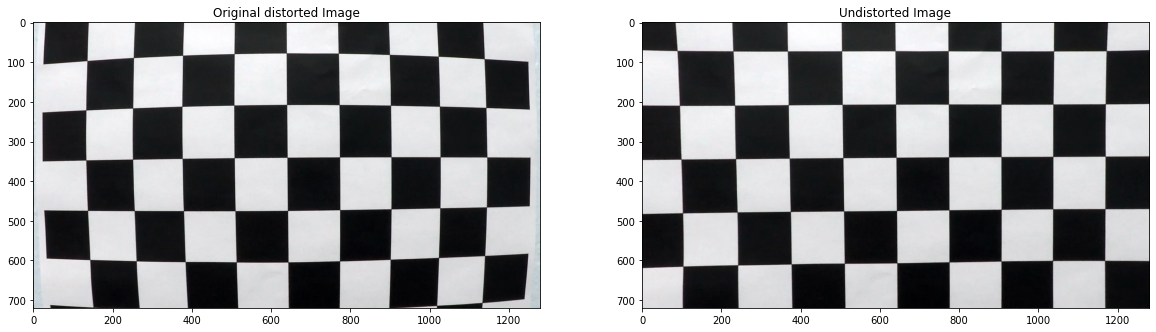

In [6]:
origin_img = cv2.imread(images[6])
undist_img = undistort(origin_img)

fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].imshow(origin_img)
axes[0].set_title('Original distorted Image')
axes[1].imshow(undist_img)
axes[1].set_title('Undistorted Image')

In [9]:
pipeline(op='Undistorted')

test_images  6


NameError: name 'bgr_to_rgb' is not defined

<h3>Create thresholded binary Image </h3>

<h6> Building the pipeline of fuctions for better readability and Maitenance </h6>

In [10]:
def bgr_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def plotter(test_img, new_img, plot_title=None, n=0):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    f.tight_layout()
    matplotlib.rc('xtick', labelsize=15) 
    matplotlib.rc('ytick', labelsize=15)
    ax1.imshow(test_img)
    ax1.set_title('Original Image:', fontsize=15)
    ax2.imshow(new_img, cmap='gray')
    ax2.set_title('{0} Test {1}:'.format(plot_title, n+1), fontsize=15)

In [73]:
def pipeline(op=None):
    
    test_images = glob.glob('test_images/test*.jpg')
    print ('test_images ', len(test_images))
    n = 0
    for img in test_images:
        img = cv2.imread(img)
        test_img = bgr_to_rgb(img)
        if op == 'Undistorted':
            new_img = undistort(img)
            plotter(test_img, cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB), op, n)
            plt.savefig('output_images/undistorted.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Sobel X':
            new_img = undistort(img)
            new_img = abs_sobel_thresh(img,thresh=(35,255))
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/sobel_x.png'.format(op), bbox_inches="tight")
            break
        if op == 'Sobel Y':
            new_img = undistort(img)
            new_img = abs_sobel_thresh(img,orient='y',thresh=(35,255))
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/sobel_y.png'.format(op), bbox_inches="tight")
            break
        if op == 'Gradient Magnitude':
            new_img = undistort(img)
            new_img = mag_thresh(img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/gradient_magnitude.png'.format(op), bbox_inches="tight")
            break
        if op == 'Gradient Direction':
            new_img = undistort(img)
            new_img = dir_threshold(img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/gradient_direction.png'.format(op), bbox_inches="tight")
            break
        if op == 'Color Thresholds':
            new_img = undistort(img)
            new_img = hls_select(img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/color_thresholds.png'.format(op), bbox_inches="tight")
            break
        if op == 'Multi-Thresholded Binary':
            new_img = undistort(img)
            new_img = combined_threshold(new_img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/thresholded_binary.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Region Masking':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img = region_of_interest(new_img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/region_masked.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Perspective Transform':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img = region_of_interest(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/perspective_transform.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Sliding Windows':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img = region_of_interest(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, 
            rightx, leftx_base, rightx_base = sliding_windows(new_img)
            plotter(test_img, windows_img, op, n)
            plt.plot(left_fitx, ploty, color='yellow')
            plt.plot(right_fitx, ploty, color='yellow')
            plt.xlim(0, 1280)
            plt.ylim(720, 0)
            plt.savefig('output_images/sliding_windows.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Shaded Lanes':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img = region_of_interest(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, 
            leftx, rightx, leftx_base, rightx_base = sliding_windows(new_img)
            shades_img, ploty, left_fitx, right_fitx,left_fit, right_fit = shaded_lanes(new_img, left_fit, right_fit)
            plotter(test_img, shades_img, op, n)
            plt.plot(left_fitx, ploty, color='yellow')
            plt.plot(right_fitx, ploty, color='yellow')
            plt.xlim(0, 1280)
            plt.ylim(720, 0)
            plt.savefig('output_images/shaded_lanes.png'.format(op), bbox_inches="tight")
            #break
        if op == 'Radius of Curvature in Pixels':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, rightx,leftx_base, rightx_base = sliding_windows(new_img)
            left_curverad, right_curverad = roc_in_pixels(ploty, left_fit, right_fit, leftx, rightx)
            print('Test Image {0}\nLeft Radius of Curvature: {1:2f} pixels\nRight Radius of Curvature: {2:2f} pixels\n'.format(n+1, left_curverad, right_curverad))
            break
        if op == 'Radius of Curvature in Meters':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, 
            right_fit, leftx,rightx, leftx_base, rightx_base = sliding_windows(new_img)
            left_curverad, right_curverad = roc_in_meters(ploty, left_fit, right_fit, leftx, rightx)
            print('Test Image {0}\nLeft Radius of Curvature: {1:2f} meters\nRight Radius of Curvature: {2:2f} meters\n'.format(n+1, left_curverad, right_curverad))
            break
        if op == 'Camera Offset':
            new_img = undistort(img)
            new_img = combined_thresholds(new_img)
            new_img, M, Minv = transform_perspective(new_img)
            windows_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, rightx, leftx_base, rightx_base = sliding_windows(new_img)
            width = img.shape[1]
            img_center = width/2
            camera = offset(img_center, leftx_base, rightx_base)
            print('Test Image: {0}\nOffset from Lane Center: {1:2f} meters\n'.format(n+1, camera))
            break
        if op == 'Lane Mapping':
            undistorted_img = undistort(img)
            new_img = combined_thresholds(undistorted_img)
            warped_img, M, Minv = transform_perspective(new_img)
            new_img, ploty, left_fitx, right_fitx, left_fit, right_fit, leftx, rightx, leftx_base, rightx_base = sliding_windows(warped_img)
            new_img = lane_mapping(img.shape[:2], warped_img, Minv, ploty, left_fitx, right_fitx, cv2.cvtColor(undistorted_img, cv2.COLOR_BGR2RGB))
            plotter(test_img, new_img, op, n)
            plt.savefig('output_images/lane_mapping.png'.format(op), bbox_inches="tight")
            #break
        n += 1

In [74]:
# Load test images.
testImages = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)), 
                      glob.glob('./test_images/*.jpg')))

<h6> Functions to work with direvatives of images in x and y directions. </h6>


In [75]:
# function to return thresholded gradient based binary output 
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh=(0,255)): 
    # 1. Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2. Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x': 
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    else: 
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3. Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    
    # 4. Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(abs_sobel * 255 / np.max(abs_sobel))
    
    # 5. Threshold the scaled_sobel and create a binary output
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel > thresh[0]) & (scaled_sobel <= thresh[1])] = 1
    
    return binary_output

test_images  6


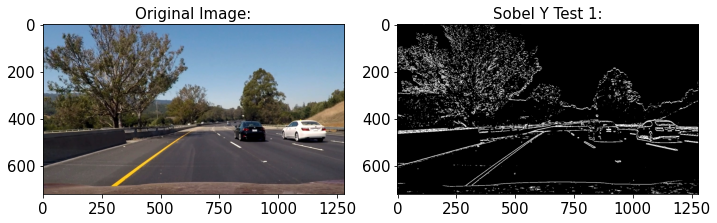

In [76]:
pipeline(op='Sobel Y')

test_images  6


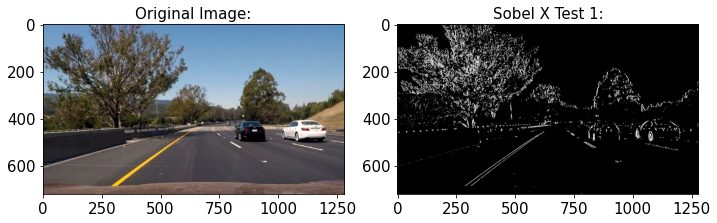

In [77]:
pipeline(op='Sobel X')

In [78]:
# function to return magnitute of derivatives thresholded binary output
def mag_thresh(img, sobel_kernel=3, thresh=(50,255)): 
    # 1. Convert to grayscale 
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2. Take the gradient in x and y separately 
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3. Calculate the magnitude
    magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
    
    # 4. Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_mag = np.uint8(magnitude * 255 / np.max(magnitude))
    
    # 5. Create a binary mask where magnitude thresholds are met 
    binary_output = np.zeros_like(scaled_mag)
    binary_output[(scaled_mag > thresh[0]) & (scaled_mag <= thresh[1])] = 1
    
    return binary_output

test_images  6


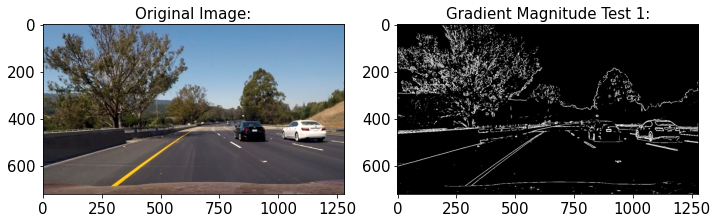

In [79]:
pipeline(op='Gradient Magnitude')

In [80]:
# function to return direction of derivatives thresholded binary output
def dir_threshold(img, sobel_kernel=3, thresh=(0.7, 1.1)):
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

    # 3) Take the absolute value of the x and y gradients
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)

    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    dir_grad = np.arctan2(abs_sobely, abs_sobelx)

    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(gray)
    binary_output[(dir_grad >= thresh[0]) & (dir_grad <= thresh[1])] = 1

    return binary_output

test_images  6


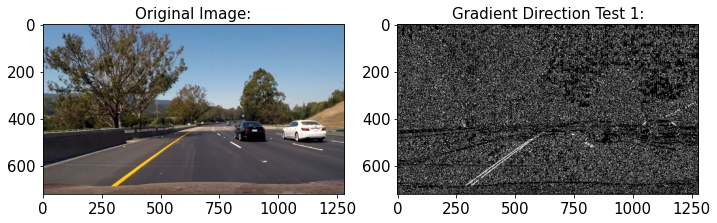

In [81]:
pipeline(op='Gradient Direction')

In [86]:
# Get pixel values for white colors from all RGB channels 
def rgb_white(img):
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    binary_output = np.zeros_like(r)
    binary_output[(r >= 210) & (g >= 200) & (b >= 190)] = 1
    return binary_output

# Filter out the lower pixel values in all RGB channels to avoid shadow
def suppress_shadow(img):
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]

    binary_output = np.zeros_like(r)
    binary_output[(r > 30) | (g > 30) | (b > 30)] = 1
    return binary_output

# Convert RGB to HLS color space and return a thresholded channel
def hls_select(img, selected='s', thresh=(80, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)

    # 2) Apply a threshold to the selected channel
    idx = {'h': 0, 'l': 1, 's': 2}[selected.lower()]
    channel = hls[:, :, idx]

    binary_output = np.zeros_like(channel)
    binary_output[(channel > thresh[0]) & (channel <= thresh[1])] = 1
    return binary_output

test_images  6


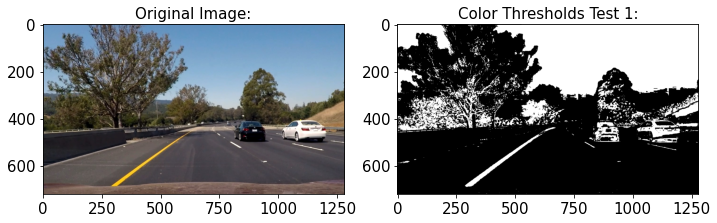

In [87]:
pipeline(op='Color Thresholds')

In [88]:
def combined_threshold(image):
    """return the binary warp result of the image"""
    ksize = 5

    # Apply each of the thresh-holding functions
    gradx = abs_sobel_thresh(image, orient='x', sobel_kernel=ksize, thresh=(50, 255))
    grady = abs_sobel_thresh(image, orient='y', sobel_kernel=ksize, thresh=(100, 255))
    s_channel = hls_select(image, selected='s', thresh=(180, 255)) & suppress_shadow(image)
    white = rgb_white(image)
    shadowed_yellow = hls_select(image, selected='h', thresh=(18, 63)) & \
                      hls_select(image, selected='s', thresh=(55, 255)) & \
                      hls_select(image, selected='l', thresh=(0, 140))

    combined = gradx | grady | s_channel | shadowed_yellow | white
    return combined

test_images  6


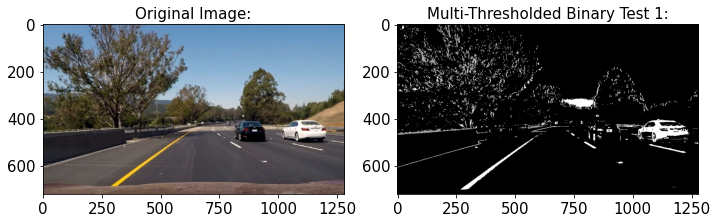

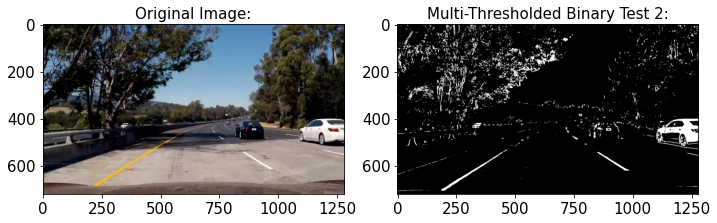

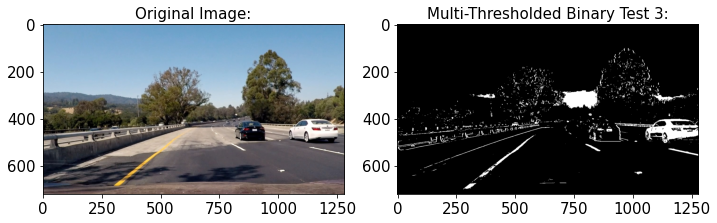

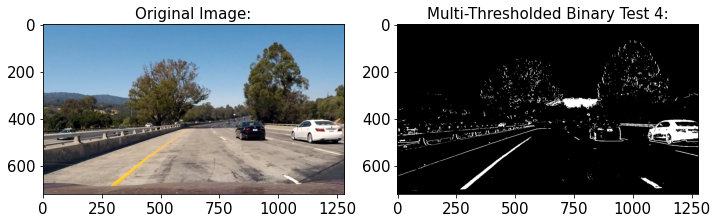

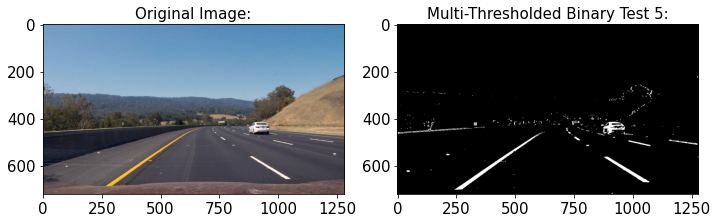

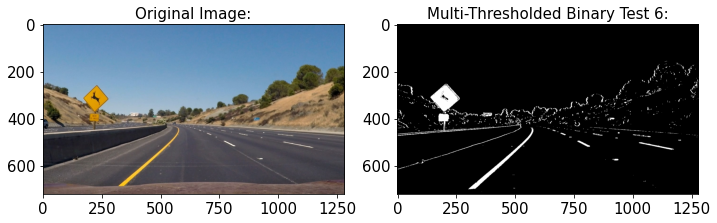

In [89]:
pipeline(op='Multi-Thresholded Binary')

<h3>Perspective Transform</h3> 